In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

# Install Dependencies

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("GPU Available: ", tf.test.is_gpu_available())

In [ ]:
!pip install opencv-python-headless

In [ ]:
import shutil
import os

# Define paths
train_labels_dir = '/kaggle/input/football/dataset/train/labels'
train_images_dir = '/kaggle/input/football/dataset/train/images'
test_labels_dir = '/kaggle/input/football/dataset/test/labels'
test_images_dir = '/kaggle/input/football/dataset/test/images'

merged_dir = '/kaggle/working/train_data'
merged_labels_dir = os.path.join(merged_dir, 'labels')
merged_images_dir = os.path.join(merged_dir, 'images')

# Create directories
os.makedirs(merged_labels_dir, exist_ok=True)
os.makedirs(merged_images_dir, exist_ok=True)

# Function to copy files from source to destination
def copy_files(src_dir, dest_dir):
    for file_name in os.listdir(src_dir):
        shutil.copy(os.path.join(src_dir, file_name), dest_dir)

# Merge train and test directories
copy_files(train_labels_dir, merged_labels_dir)
copy_files(train_images_dir, merged_images_dir)
copy_files(test_labels_dir, merged_labels_dir)
copy_files(test_images_dir, merged_images_dir)

# Splitting data

split the validation directory which contains labels and images into two separate directories at a ratio of 3:1 .. 
* the first for valid 
* second for test

In [ ]:
import os
import shutil
import random

# Define paths
validation_labels_dir = '/kaggle/input/football/dataset/val/labels'
validation_images_dir = '/kaggle/input/football/dataset/val/images'

split1_dir = '/kaggle/working/valid'
split1_labels_dir = os.path.join(split1_dir, 'labels')
split1_images_dir = os.path.join(split1_dir, 'images')

split2_dir = '/kaggle/working/test'
split2_labels_dir = os.path.join(split2_dir, 'labels')
split2_images_dir = os.path.join(split2_dir, 'images')

# Create directories

os.makedirs(split1_labels_dir, exist_ok=True)
os.makedirs(split1_images_dir, exist_ok=True)
os.makedirs(split2_labels_dir, exist_ok=True)
os.makedirs(split2_images_dir, exist_ok=True)

# Function to split files from source into two directories based on a ratio
def split_files(src_dir, dest_dir1, dest_dir2, ratio=0.75):
    files = os.listdir(src_dir)
    random.shuffle(files)  # Shuffle for randomness
    
    split_idx = int(len(files) * ratio)
    for i, file_name in enumerate(files):
        if i < split_idx:
            shutil.copy(os.path.join(src_dir, file_name), dest_dir1)
        else:
            shutil.copy(os.path.join(src_dir, file_name), dest_dir2)

# Split validation into split1 and split2 at a ratio of 3:1
split_files(validation_labels_dir, split1_labels_dir, split2_labels_dir, ratio=0.75)
split_files(validation_images_dir, split1_images_dir, split2_images_dir, ratio=0.75)

In [ ]:
import os
import glob

main_directory = "/kaggle/working"  # Replace with your directory path
sub_directories = ['train_data', 'test', 'valid']


class_ids_to_keep  = [0, 1]

for sub_dir in sub_directories:
    
    sub_dir_path = os.path.join(main_directory, sub_dir)
    
    image_dir = os.path.join(sub_dir_path, "images")
    label_dir = os.path.join(sub_dir_path, "labels")

    image_files = glob.glob(os.path.join(image_dir, "*.png"))
    label_files = glob.glob(os.path.join(label_dir, "*.txt"))
    
    for label_file in label_files:
        with open(label_file, 'r') as f:
            lines = f.readlines()
        
        filtered_lines = []
        for line in lines: 
            parts = line.strip().split(' ')
            class_id = int(parts[0])
            if class_id in class_ids_to_keep:
                filtered_lines.append(line)
        
        with open(label_file, 'w') as f:
            f.writelines(filtered_lines)

# Remove missing labels and images

In [ ]:
import os
base_dir = '/kaggle/working/'


sub_dirs = ['train_data', 'test', 'valid']

total_removed_labels = 0

for sub in sub_dirs:
    image_dir = os.path.join(base_dir, sub, 'images')
    label_dir = os.path.join(base_dir, sub, 'labels')

    # Get the list of image files and label files
    image_files = set([f for f in os.listdir(image_dir) if f.endswith('.png')])
    label_files = set([f.replace('.txt', '.png') for f in os.listdir(label_dir) if f.endswith('.txt')])

    # Find the difference - labels that don't have corresponding image files
    unmatched_labels = label_files - image_files

    # Remove these unmatched labels
    for unmatched in unmatched_labels:
        unmatched_txt = unmatched.replace('.png', '.txt')  # Convert back to .txt for deletion
        os.remove(os.path.join(label_dir, unmatched_txt))
        # print(f"Removed {unmatched_txt} as it doesn't have a corresponding image.")
        total_removed_labels += 1

print(f"Total number of label files removed: {total_removed_labels}")

In [ ]:
import os

base_dir = '/kaggle/working/'


sub_dirs = ['train_data', 'test', 'valid']

total_removed = 0

for sub in sub_dirs:
    image_dir = os.path.join(base_dir, sub, 'images')
    label_dir = os.path.join(base_dir, sub, 'labels')

    # Get the list of image files and label files
    image_files = set([f for f in os.listdir(image_dir) if f.endswith('.png')])
    label_files = set([f.replace('.txt', '.png') for f in os.listdir(label_dir) if f.endswith('.txt')])

    # Find the difference - images that don't have corresponding label files
    unmatched_images = image_files - label_files

    # Remove these unmatched images
    for unmatched in unmatched_images:
        os.remove(os.path.join(image_dir, unmatched))
        # print(f"Removed {unmatched} as it doesn't have a corresponding label.")
        total_removed += 1

print(f"Total number of images removed: {total_removed}")

# Extract ROI images

In [ ]:
# output_base_dir = "/kaggle/working/classification_dataset"
# categories = ["L_Team", "R_Team", "L_Goalkeeper", "R_Goalkeeper"]

# for category in categories:
#     os.makedirs(os.path.join(output_base_dir, category), exist_ok=True)

In [ ]:
import os
import cv2

base_dir = '/kaggle/working/'
sub_dirs = ['train_data', 'test', 'valid']

def yolo_to_pixel_coords(img_width, img_height, x_center, y_center, width, height):
    abs_x_center = x_center * img_width
    abs_y_center = y_center * img_height
    abs_width = width * img_width
    abs_height = height * img_height

    top_left_x = abs_x_center - (abs_width / 2)
    top_left_y = abs_y_center - (abs_height / 2)
    bottom_right_x = abs_x_center + (abs_width / 2)
    bottom_right_y = abs_y_center + (abs_height / 2)
    
    return int(top_left_x), int(top_left_y), int(bottom_right_x), int(bottom_right_y)

# Ensure directories for the cropped images exist
output_base_dir = os.path.join(base_dir, "cropped_images")
categories = ["L_Team", "R_Team"]

for category in categories:
    for sub in sub_dirs:
        os.makedirs(os.path.join(output_base_dir, sub, category), exist_ok=True)

for sub in sub_dirs:
    image_dir = os.path.join(base_dir, sub, 'images')
    label_dir = os.path.join(base_dir, sub, 'labels')

    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                if class_id in [0, 1]:
                    # Load the corresponding image
                    image_name = label_file.replace(".txt", ".png")
                    img_path = os.path.join(image_dir, image_name)
                    img = cv2.imread(img_path)
                    
                    # Check if image is loaded
                    if img is None:
                        continue

                    h, w, _ = img.shape

                    # Convert YOLO to pixel coordinates and check them
                    x1, y1, x2, y2 = yolo_to_pixel_coords(w, h, x_center, y_center, width, height)
                    if x1 < 0 or y1 < 0 or x2 > w or y2 > h:
                        continue

                    cropped_img = img[y1:y2, x1:x2]

                    # Check cropped image validity
                    if cropped_img.size == 0:
                        continue

                    # Save cropped image in the appropriate directory
                    output_path = os.path.join(output_base_dir, sub, categories[int(class_id)], f"{image_name}_{line.strip().replace(' ', '_')}.png")
                    cv2.imwrite(output_path, cropped_img)

In [ ]:

# print("Number of training images:" ,  len(os.listdir("/kaggle/working/cropped_images/test/L_Goalkeeper")))
print("Number of validation images:", len(os.listdir("/kaggle/working/cropped_images/test/L_Team")))
print("Number of test images:", len(os.listdir("/kaggle/working/cropped_images/train_data/R_Team")))

In [ ]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the dimensions expected by your model
IMG_WIDTH = 224
IMG_HEIGHT = 224

# Set the path to your data directory
data_dir = '/kaggle/working/cropped_images'

# Define a mapping from directory names to labels
label_mapping = {"R_Team": 1, "L_Team": 0}

# Define an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,          # Rotate images by up to 20 degrees
    width_shift_range=0.2,      # Shift width by up to 20% of the image width
    height_shift_range=0.2,     # Shift height by up to 20% of the image height
    shear_range=0.2,            # Apply shear transformation
    zoom_range=0.2,             # Zoom in by up to 20%
    horizontal_flip=True,       # Flip images horizontally
    fill_mode='nearest',        # Fill in missing pixels with the nearest value
    rescale=1.0 / 255.0         # Normalize pixel values to the range [0, 1]
)

# Create a generator for training data with augmentation
train_datagen = datagen.flow_from_directory(
    os.path.join(data_dir, 'train_data'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,              # Batch size for training
    class_mode='binary',        # Binary classification
    shuffle=True                # Shuffle the data
)

# Create a generator for validation data (no augmentation)
val_datagen = datagen.flow_from_directory(
    os.path.join(data_dir, 'valid'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,              # Batch size for validation
    class_mode='binary',        # Binary classification
    shuffle=False               # Do not shuffle the data for validation
)

# Create a generator for test data (no augmentation)
test_datagen = datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,              # Batch size for testing
    class_mode='binary',        # Binary classification
    shuffle=False               # Do not shuffle the data for testing
)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pre-trained model from Kaggle using TensorFlow Hub
model_url = "https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1"
m = tf.keras.Sequential([
    hub.KerasLayer(model_url)
])

# Build the model with the specified input shape
m.build([None, 224, 224, 3])  # Batch input shape

# Display model summary
m.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)     

In [41]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping



In [51]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_hub as hub

# Define data directories
data_dir = '/kaggle/working/cropped_images'
train_dir = os.path.join(data_dir, 'train_data')
valid_dir = os.path.join(data_dir, 'valid')

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255.0
)

# Data augmentation for validation and test data (only rescale)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators
batch_size = 64
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 model from Kaggle URL
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights=None,
    pooling='avg'
)

# Add custom classification head
x = base_model.output
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the transfer learning model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
epochs = 50
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[early_stopping])


Found 9238 images belonging to 2 classes.
Found 3293 images belonging to 2 classes.
Epoch 1/50
145/145 [==============================] - 80s 344ms/step - loss: 0.7136 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/50
145/145 [==============================] - 49s 340ms/step - loss: 0.6945 - accuracy: 0.5095 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/50
145/145 [==============================] - 48s 333ms/step - loss: 0.6935 - accuracy: 0.5079 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 4/50
145/145 [==============================] - 49s 337ms/step - loss: 0.6918 - accuracy: 0.5223 - val_loss: 0.6941 - val_accuracy: 0.4989
Epoch 5/50
145/145 [==============================] - 49s 335ms/step - loss: 0.6908 - accuracy: 0.5305 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 6/50
145/145 [==============================] - 49s 339ms/step - loss: 0.6892 - accuracy: 0.5446 - val_loss: 0.6951 - val_accuracy: 0.4989
Epoch 7/50
145/145 [==========================

In [52]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_generator)

print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


52/52 [==============================] - 3s 49ms/step - loss: 0.6932 - accuracy: 0.4989
Validation Loss: 0.6932
Validation Accuracy: 0.4989


1/1 [==============================] - 0s 24ms/step


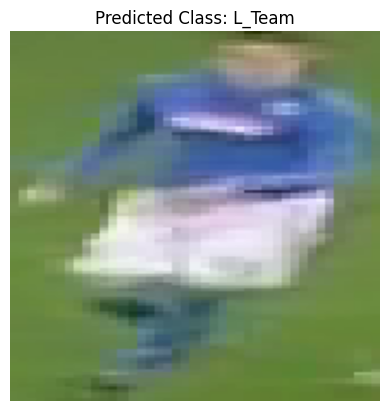

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to a test image
test_image_path = '/kaggle/working/cropped_images/test/R_Team/10832.png_1_0.5474635416666668_0.262375_0.0214479166666667_0.09458333333333334.png'  # Replace with the actual path

# Load the test image and preprocess it
test_image = image.load_img(test_image_path, target_size=(128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize pixel values

# Make predictions using the trained model
predictions = model.predict(test_image)

# Convert predictions to class labels
class_labels = ['L_Team', 'R_Team']  # Class labels for '0' and '1'
predicted_class = class_labels[int(predictions[0][0])]

# Display the test image
plt.imshow(test_image[0])
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()


In [ ]:
epochs = 50
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[early_stopping])


In [58]:
# Define the directory to save the model
model_save_dir = '/kaggle/working/mobnetmodel'  # Replace with the actual path

# Save the model
model.save(model_save_dir)

print(f"Model saved to {model_save_dir}")


Model saved to /kaggle/working/mobnetmodel


In [64]:
import torch
import torchvision.transforms as T

# Load DETR model on CPU

# Load DETR model checkpoint
detr_checkpoint = torch.load('/kaggle/input/detrmodel/model_checkpointv4.pth', map_location=torch.device('cpu'))

# Print the keys in the checkpoint
print(detr_checkpoint.keys())


odict_keys(['model.model.backbone.conv_encoder.model.conv1.weight', 'model.model.backbone.conv_encoder.model.bn1.weight', 'model.model.backbone.conv_encoder.model.bn1.bias', 'model.model.backbone.conv_encoder.model.bn1.running_mean', 'model.model.backbone.conv_encoder.model.bn1.running_var', 'model.model.backbone.conv_encoder.model.layer1.0.conv1.weight', 'model.model.backbone.conv_encoder.model.layer1.0.bn1.weight', 'model.model.backbone.conv_encoder.model.layer1.0.bn1.bias', 'model.model.backbone.conv_encoder.model.layer1.0.bn1.running_mean', 'model.model.backbone.conv_encoder.model.layer1.0.bn1.running_var', 'model.model.backbone.conv_encoder.model.layer1.0.conv2.weight', 'model.model.backbone.conv_encoder.model.layer1.0.bn2.weight', 'model.model.backbone.conv_encoder.model.layer1.0.bn2.bias', 'model.model.backbone.conv_encoder.model.layer1.0.bn2.running_mean', 'model.model.backbone.conv_encoder.model.layer1.0.bn2.running_var', 'model.model.backbone.conv_encoder.model.layer1.0.conv3

In [76]:
pwd

'/kaggle/working'